# **Project 1 - Salary Prediction**
## **Contents**
* [Introduction](#Introduction)
  * [Context](#Context)
  * [Python Libraries](#Python-Libraries)
  * [Data Source](#Data-Source)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Importation](#Data-Importation)
  * [Data Conversion](#Data-Conversion)
  * [Data Cleaning](#Data-Cleaning)
  * [Numerical Variable Exploration](#Numerical-Variable-Exploration)
  * [Categorical Variable Exploration](#Categorical-Variable-Exploration)
  * [Summary](#Summary)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Model Evaluation](#Model-Evaluation)
* [Machine Learning Pipelines and Model Deployment](#Machine-Learning-Pipelines-and-Model-Deployment)
* [Recommendation](#Recommendation)
* [Conclusion](#Conclusion)

## **Introduction**
### **Context**
The purpose of this project is to predict the salaries of data professionals from a given dataset. The approach taken in this project is to analyse the dataset and prepare it for the implementation of several machine learning models in order to predict the response variable (i.e. the salary of a data professional) from one or several carefully chosen explanatory variables. Next, each of the machine learning models implemented will be evaluated using a set of chosen metrics, and deployed. Finally the best performing machine learning model is chosen as a recommendation for predicting the salaries of data professionals.

### **Python Libraries**
In order to begin this project, the following Python libraries are imported, with the following justifications:
* `os`, for file handling;
* `sys`, for system handling;
* `numpy`, for numerical calculations;
* `scipy`, for scientific computing;
* `sympy`, for symbolic mathematics;
* `pandas`, for data analysis;
* `matplotlib`, for data visualisation;
* `matplotlib.pyplot`, for data visualisation;
* `seaborn`, for data visualisation;
* `warnings`, for warning handling;
* `sklearn`, for machine learning;
* `sklearn.preprocessing`, for preprocessing the dataset;
* `sklearn.linear_model`, for implementing regression models, and;
* `sklearn.metrics`, for model evaluation.

The Python code used to import all of the above-mentioned Python libraries is given in the code cell below. Additional care has been exercised in order to use a random seed value for code reproducibility, a plot style for aesthetics, and the ignoring of warnings which are not important for the purposes of this project.

In [26]:
# Import packages
import os
import sys
import numpy as np
import scipy as sp
import sympy as smp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# Set a random seed value for code reproducibility
np.random.seed(42)

# Set a plot style for aesthetics
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Ignore warnings which are not important for the purposes of this project
wrn.simplefilter(action = 'ignore', category = FutureWarning)

### **Data Source**
The dataset in question is contained in the `salaries.csv` file, located in the current directory. The Python code used to import all of the above packages, as well as the dataset, is given in the code cell below. The first few rows of the dataset are also shown.

## **Exploratory Data Analysis**
The Exploratory Data Analysis step is, in this project, divided into six further steps:
1) **Data Importing:** In this step, the dataset is imported from the data source.
2) **Data Cleaning:** In this step, the dataset is cleaned. In particular, missing values and outliers are addressed, inconsistencies in the dataset are rectified, and all of the variables in the dataset are reformatted so as to appear in the right format.
3) **Data Conversion:** In this step, all variables in the dataset are converted to the appropriate data type.
4) **Numerical Variable Exploration:** In this step, the general distributions and linear relationships between numerical variables is explored, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical variables that can be of interest in building a predicitive model, later on.
5) **Categorical Variable Exploration:** In this step, the previous step is repeating, only this time controlling for specific values of the different categorical variables, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical and categorical variables that can be of interest in building a predictive model, later on.
6) **Summary:** In this step, all of the above steps are summarised, especially the key findings uncovered that will be important to use, when building a predictive model, later on.

The above mentioned steps are undertaken in what follows.

### **Data Importation**
As mentioned, in this step, the dataset is imported from the data source. The Python code to accomplish this is given in the code cell below. The first few rows of the dataset are also displayed.

In [27]:
# Import the dataset
df = pd.read_csv("salaries.csv")

# Display the first few rows of the dataset
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


### **Data Cleaning**
As mentioned, in this step, the dataset is cleaned. In particular, missing values and outliers are addressed, and any inconsistencies in the dataset are rectified. The Python code to accomplish this is given in the code cell below.

In [28]:
# Determine whether or not missing values should be removed (i.e. if they make up less than 5% of the dataset)
print(f"""Total number of rows in the dataset: {df.shape[0]}
Total number of missing values in the dataset: {df.isna().sum().sum()}
Missing values make up less than 5% of the dataset: {df.isna().sum().sum() / df.shape[0] < 0.05}"""
)

# Remove all rows with missing values as the criterion for this has been met
df.dropna(inplace = True)

# Display the first few rows of the dataset
df.head()

Total number of rows in the dataset: 2639
Total number of missing values in the dataset: 13
Missing values make up less than 5% of the dataset: True


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,9/2/2013,1/7/2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6/29/2014,1/7/2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


Next, the dataset will be checked for any abnormal outliers in its numerical variables. The Python code to accomplish this is given in the code cell below. 

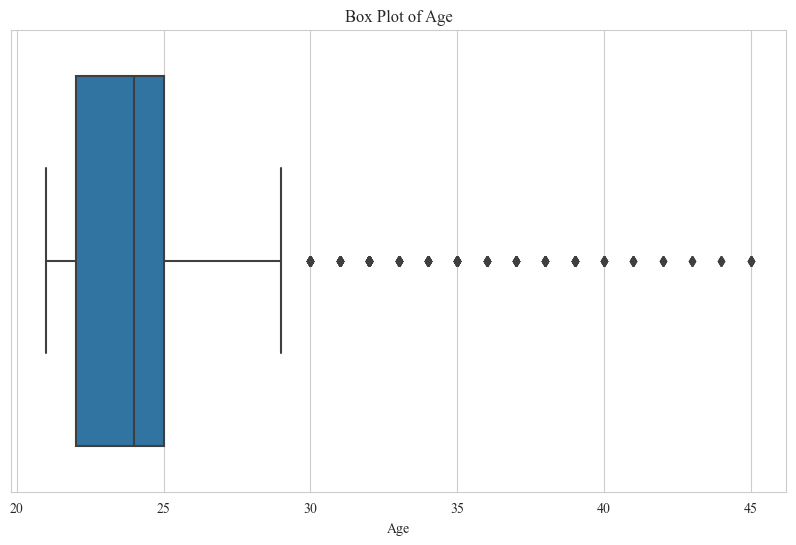

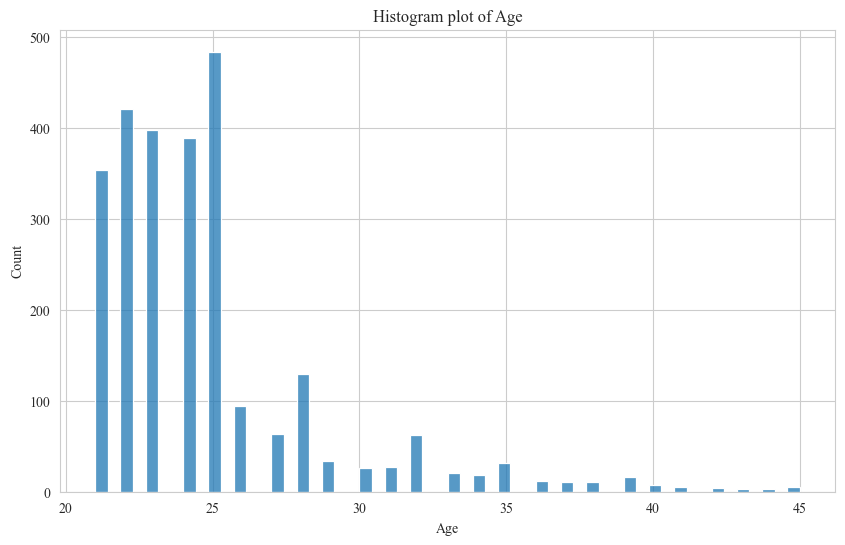

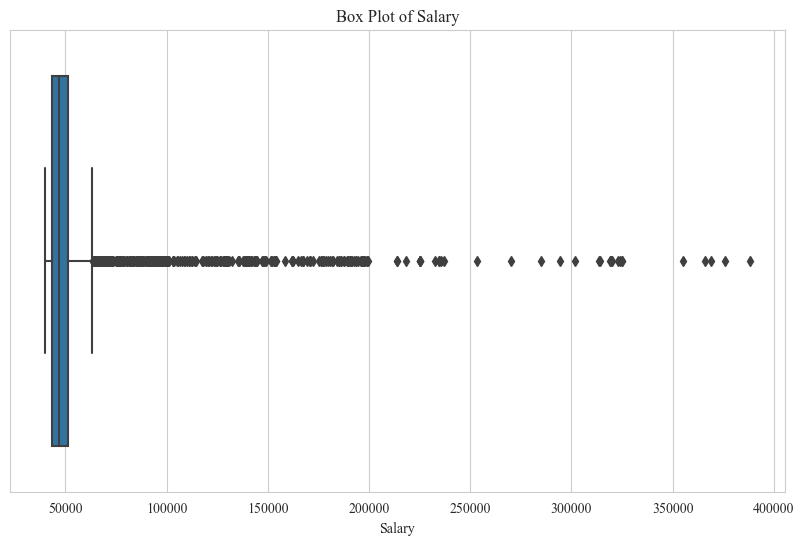

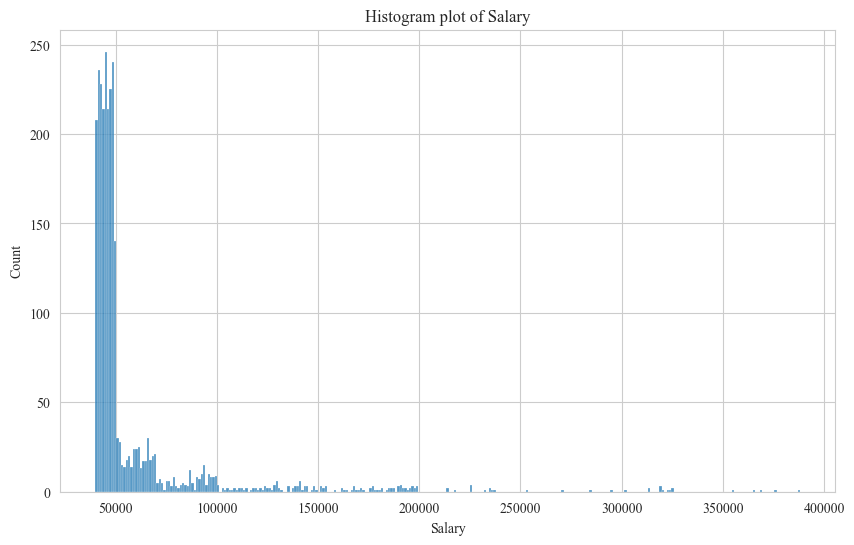

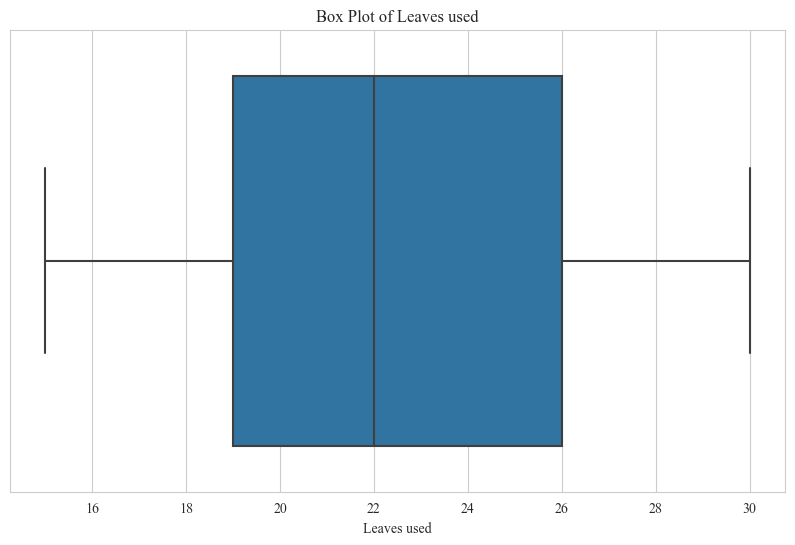

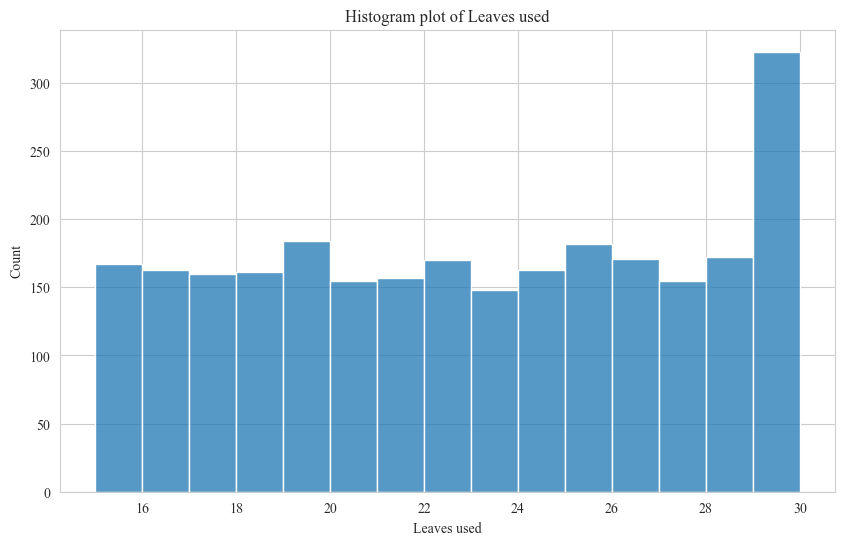

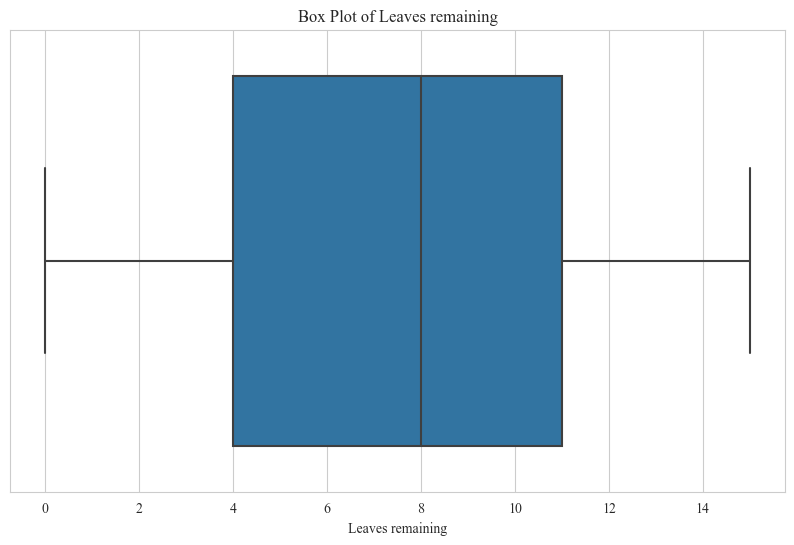

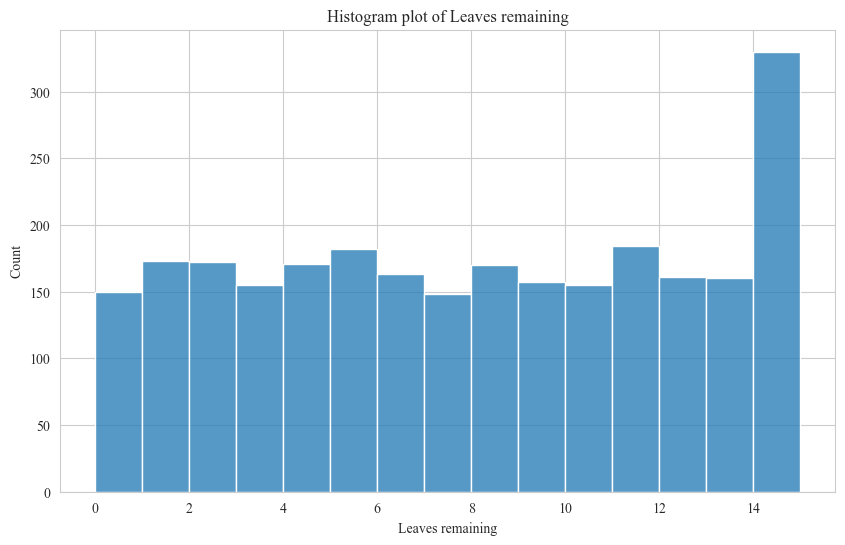

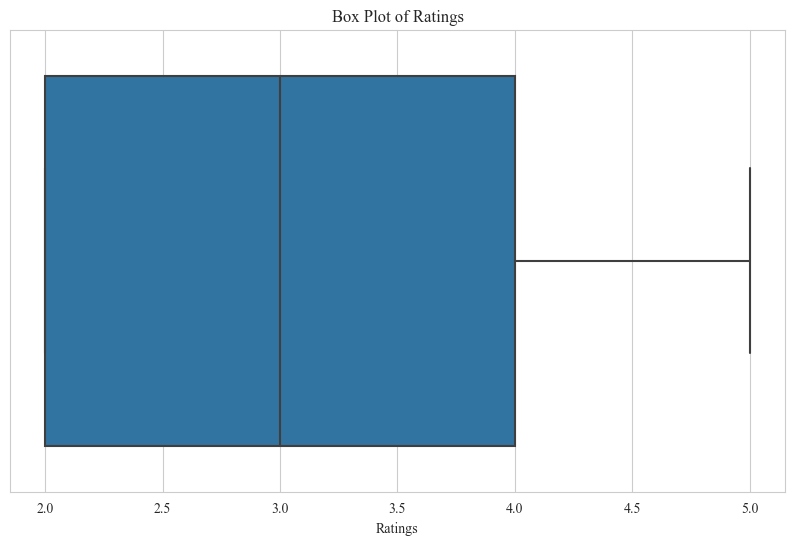

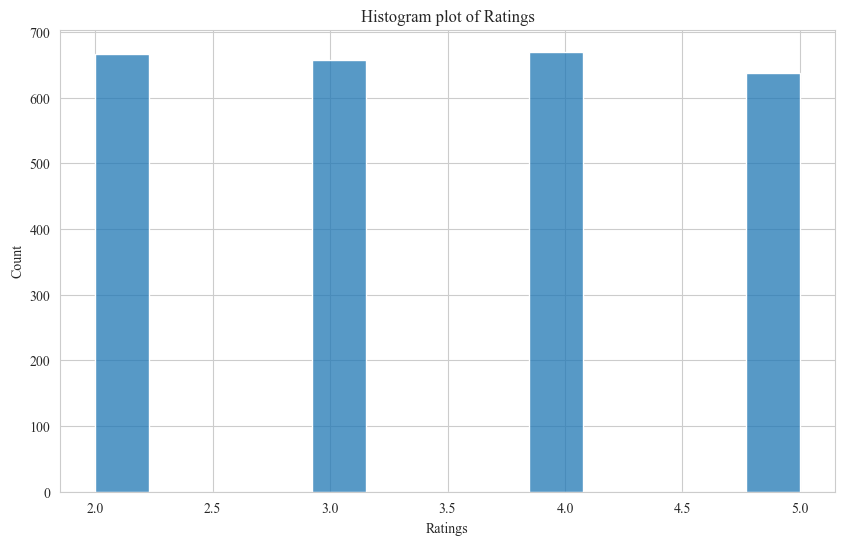

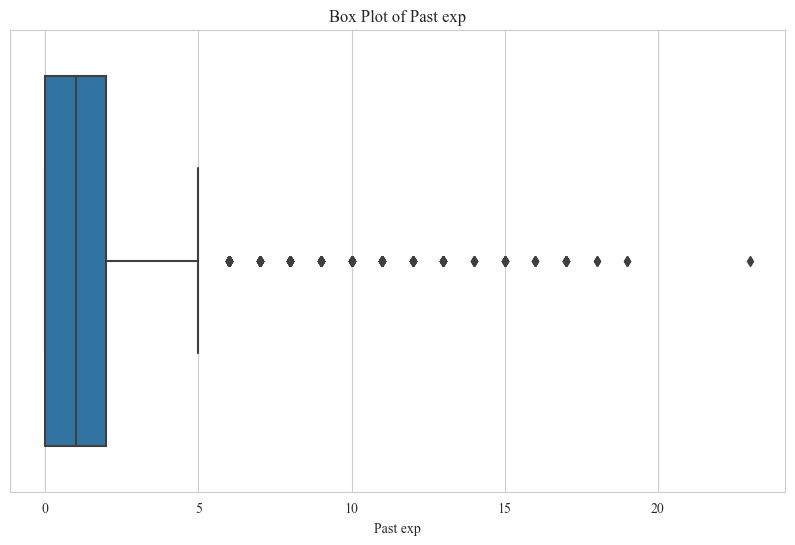

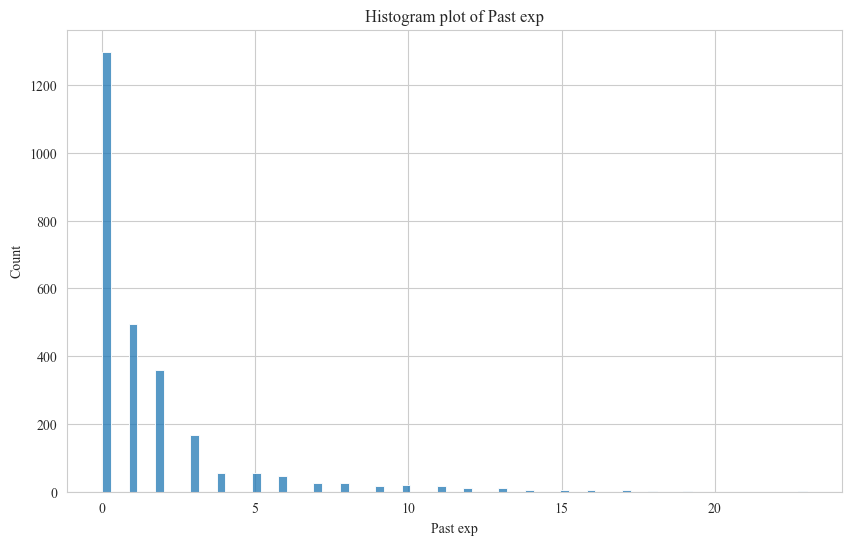

In [29]:
# Create a mask for the dataset's numerical variables
numerical_variables = ["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]

# Check for inconsistencies in the dataset's numerical variables
for x in numerical_variables:
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.boxplot(data = df, x = x).set(xlabel = x.capitalize(), title = f"Box Plot of {x.capitalize()}")
    plt.show()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.histplot(data = df, x = x).set(xlabel = x.capitalize(), title = f"Histogram plot of {x.capitalize()}")
    plt.show()

There seem to be no abnormal outliers in the dataset's numerical variables. Next, abnormal values will be checked in the dataset's categorical variables. The Python code to accomplish this is given in the code cell below:

In [30]:
# Create a mask for the dataset's categorical variables
categorical_variables = ["FIRST NAME", "LAST NAME", "SEX", "DESIGNATION", "UNIT"]

# Check for inconsistencies in the dataset's categorical variables
for x in categorical_variables:
    if x != "UNIT":
        print(f"""Column: {x}
Unique values: {list(df[x].unique())} \n """)
    else:
        print(f"""Column: {x}
Unique values: {list(df[x].unique())}""")

Column: FIRST NAME
Unique values: ['TOMASA', 'OLIVE', 'CHERRY', 'ELLIOT', 'KATHY', 'LILIAN', 'BELLE', 'WELDON', 'BOYD', 'BART', 'ALONZO', 'ROYCE', 'BURTON', 'ORVILLE', 'KORY', 'NETTIE', 'BRENT', 'HARRIETTE', 'GARLAND', 'OSWALDO', 'SEYMOUR', 'ROXANNE', 'CLAUD', 'MARIANNA', 'FOSTER', 'MAUDIE', 'TORI', 'KELLEY', 'HILLARY', 'MICKEY', 'ROSIE', 'GAVIN', 'ANNABELLE', 'CHRISTINE', 'MELODIE', 'MICHELL', 'ANDREW', 'LUCRETIA', 'JODY', 'GILDA', 'JOSPEH', 'KING', 'KURT', 'LYNNETTE', 'DANIELA', 'CARI', 'ANGELITA', 'ISABELLE', 'NORBERT', 'PAULINE', 'JANETTE', 'CHARLENE', 'HOWARD', 'PAUL', 'CORTEZ', 'AHMAD', 'JONAH', 'DARIN', 'ALONSO', 'RENE', 'RILEY', 'WYATT', 'KIMBERLEE', 'KRISTA', 'MARYJANE', 'SAVANNAH', 'NATALIE', 'MARY', 'KAYLA', 'JULIAN', 'JO', 'KASEY', 'IONA', 'ALBERTA', 'WILMER', 'MELVIN', 'CORA', 'EVERETT', 'DOTTIE', 'CORINE', 'DARIO', 'HILDA', 'ELOISA', 'HEIDI', 'KATELYN', 'WILLIS', 'RUTH', 'JOSEFA', 'OSCAR', 'ROOSEVELT', 'MARVIN', 'MARCELLA', 'KARL', 'WALTER', 'ELIZA', 'YONG', 'ALVA', 'REIN

There seem to be no inconsistencies in the dataset's categorical variables.

### **Data Conversion**
As mentioned, in this step, all of the variables of the dataset are converted to the right data type. The Python code to accomplish this is given in the code cell below. For contrast, the data types before and after the data conversion step are also displayed.

In [31]:
# Display the dataset's data types
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [32]:
# Convert all of the variables of the dataset to the right datatype
df["FIRST NAME"] = df["FIRST NAME"].astype("string")
df["LAST NAME"] = df["LAST NAME"].astype("string")
df["SEX"] = df["SEX"].astype("string")
df["DOJ"] = df["DOJ"].astype("datetime64[ns]")
df["CURRENT DATE"] = df["CURRENT DATE"].astype("datetime64[ns]")
df["DESIGNATION"] = df["DESIGNATION"].astype("string")
df["AGE"] = df["AGE"].astype("int64")
df["SALARY"] = df["SALARY"].astype("float64")
df["UNIT"] = df["UNIT"].astype("string")
df["LEAVES USED"] = df["LEAVES USED"].astype("int64")
df["LEAVES REMAINING"] = df["LEAVES REMAINING"].astype("int64")
df["RATINGS"] = df["RATINGS"].astype("float64")
df["PAST EXP"] = df["PAST EXP"].astype("int64")

# Display the dataset's data types
df.dtypes

FIRST NAME          string[python]
LAST NAME           string[python]
SEX                 string[python]
DOJ                 datetime64[ns]
CURRENT DATE        datetime64[ns]
DESIGNATION         string[python]
AGE                          int64
SALARY                     float64
UNIT                string[python]
LEAVES USED                  int64
LEAVES REMAINING             int64
RATINGS                    float64
PAST EXP                     int64
dtype: object

### **Numerical Variable Exploration**

### **Categorical Variable Exploration**
### **Summary**

## **Feature Engineering**
## **Data Preprocessing**
## **Machine Learning Model Development**
## **Model Evaluation**
## **Machine Learning Pipelines and Model Deployment**
## **Recommendation**
## **Conclusion**